# Concrete Compressive Strength

## Data Information

### Source

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. <br>
I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

### Attribute information

The dataset attributes properties are as follows:

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable- 
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable

## Notebook Setup

In [1]:
#Common imports
import sys
import os
import numpy as np

#Python Data Analysis Library
import pandas as pd

#Data visualization
%matplotlib inline 
#sets the backend of matplotlib to the 'inline' backend
#%matplotlib notebook
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Data pretty printer
from pprint import pprint

## Data Import

In [2]:
df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Data Engineering and Visualization 

### Renaming column names

In [5]:
df.columns =  [ "cement","blast_furnace_slag", "fly_ash", "water",
                     "superplasticizer", "coarse_aggregate", "fine_aggregate",
                     "age","compressive_strength"]

### Percentage of missing values

In [6]:
df.isnull().sum()/len(df)*100

cement                  0.0
blast_furnace_slag      0.0
fly_ash                 0.0
water                   0.0
superplasticizer        0.0
coarse_aggregate        0.0
fine_aggregate          0.0
age                     0.0
compressive_strength    0.0
dtype: float64

### Numerical and Categorical attributes

In [7]:
def coltype(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = list(df.select_dtypes(include=numerics).columns)
    non_numeric =['bool','category']
    categorical = list(df.select_dtypes(include=non_numeric).columns)
    return (numeric, categorical)

In [8]:
df_numeric,df_categorical = coltype(df)

In [9]:
df_numeric

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'compressive_strength']

In [10]:
df_categorical

[]

### Descriptive statistics

In [11]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Histrograms for numeric

In [12]:
def hist_plots(data, numeric,col_no):
    data_fig = pd.melt(data, value_vars= numeric)
    fig = sns.FacetGrid(data_fig, col = "variable", col_wrap = col_no,sharex= False, sharey = False)
    fig = fig.map(sns.distplot, "value", color = 'c')
    return fig
#col_no : number of columns to display in one row
#numeric : name of numeric cols

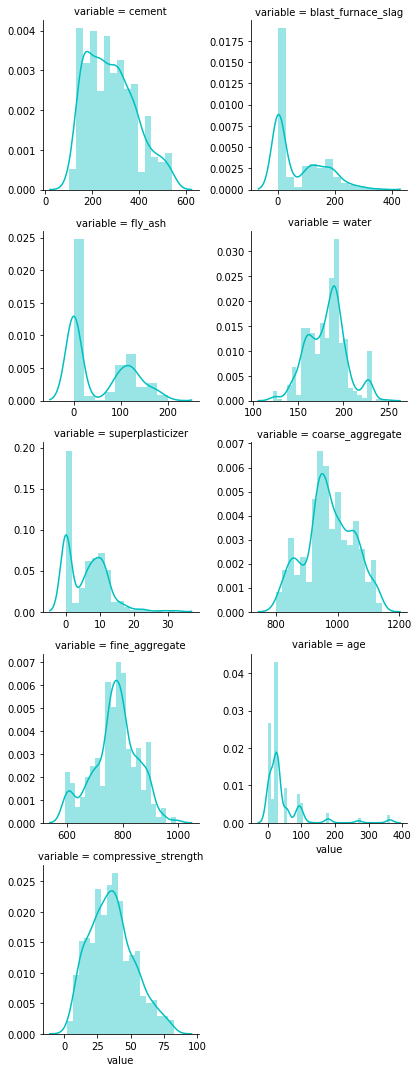

In [13]:
hist_plots(df,df_numeric,2)

### Correlation matrix

In [14]:
# Compute pairwise correlation of Dataframe's attributes
corr = df.corr()
corr

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast_furnace_slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
fly_ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse_aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine_aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [15]:
def corr_plot(data_corr):
    palette = sns.diverging_palette(20, 220, as_cmap=True)
    fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
    fig = sns.heatmap(data_corr, 
                 ax=ax,# Axes in which to draw the plot, otherwise use the currently-active Axes.
                 vmin = -1.0,
                 vmax = 1.0,
                 cmap=palette, # Color Map.
                 square=True, # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',# String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.5)
    return fig

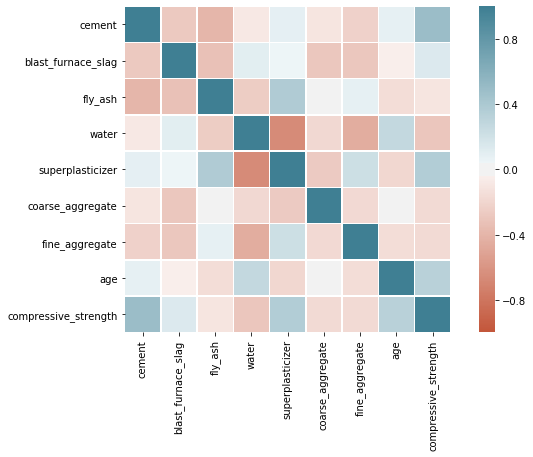

In [16]:
corr_plot(corr)

### Pair Plot

In [17]:
def pair_plot(data,col_names,hue_col):
    fig = sns.pairplot(data, hue = hue_col, vars = col_names,diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4, palette = 'colorblind')
    return fig

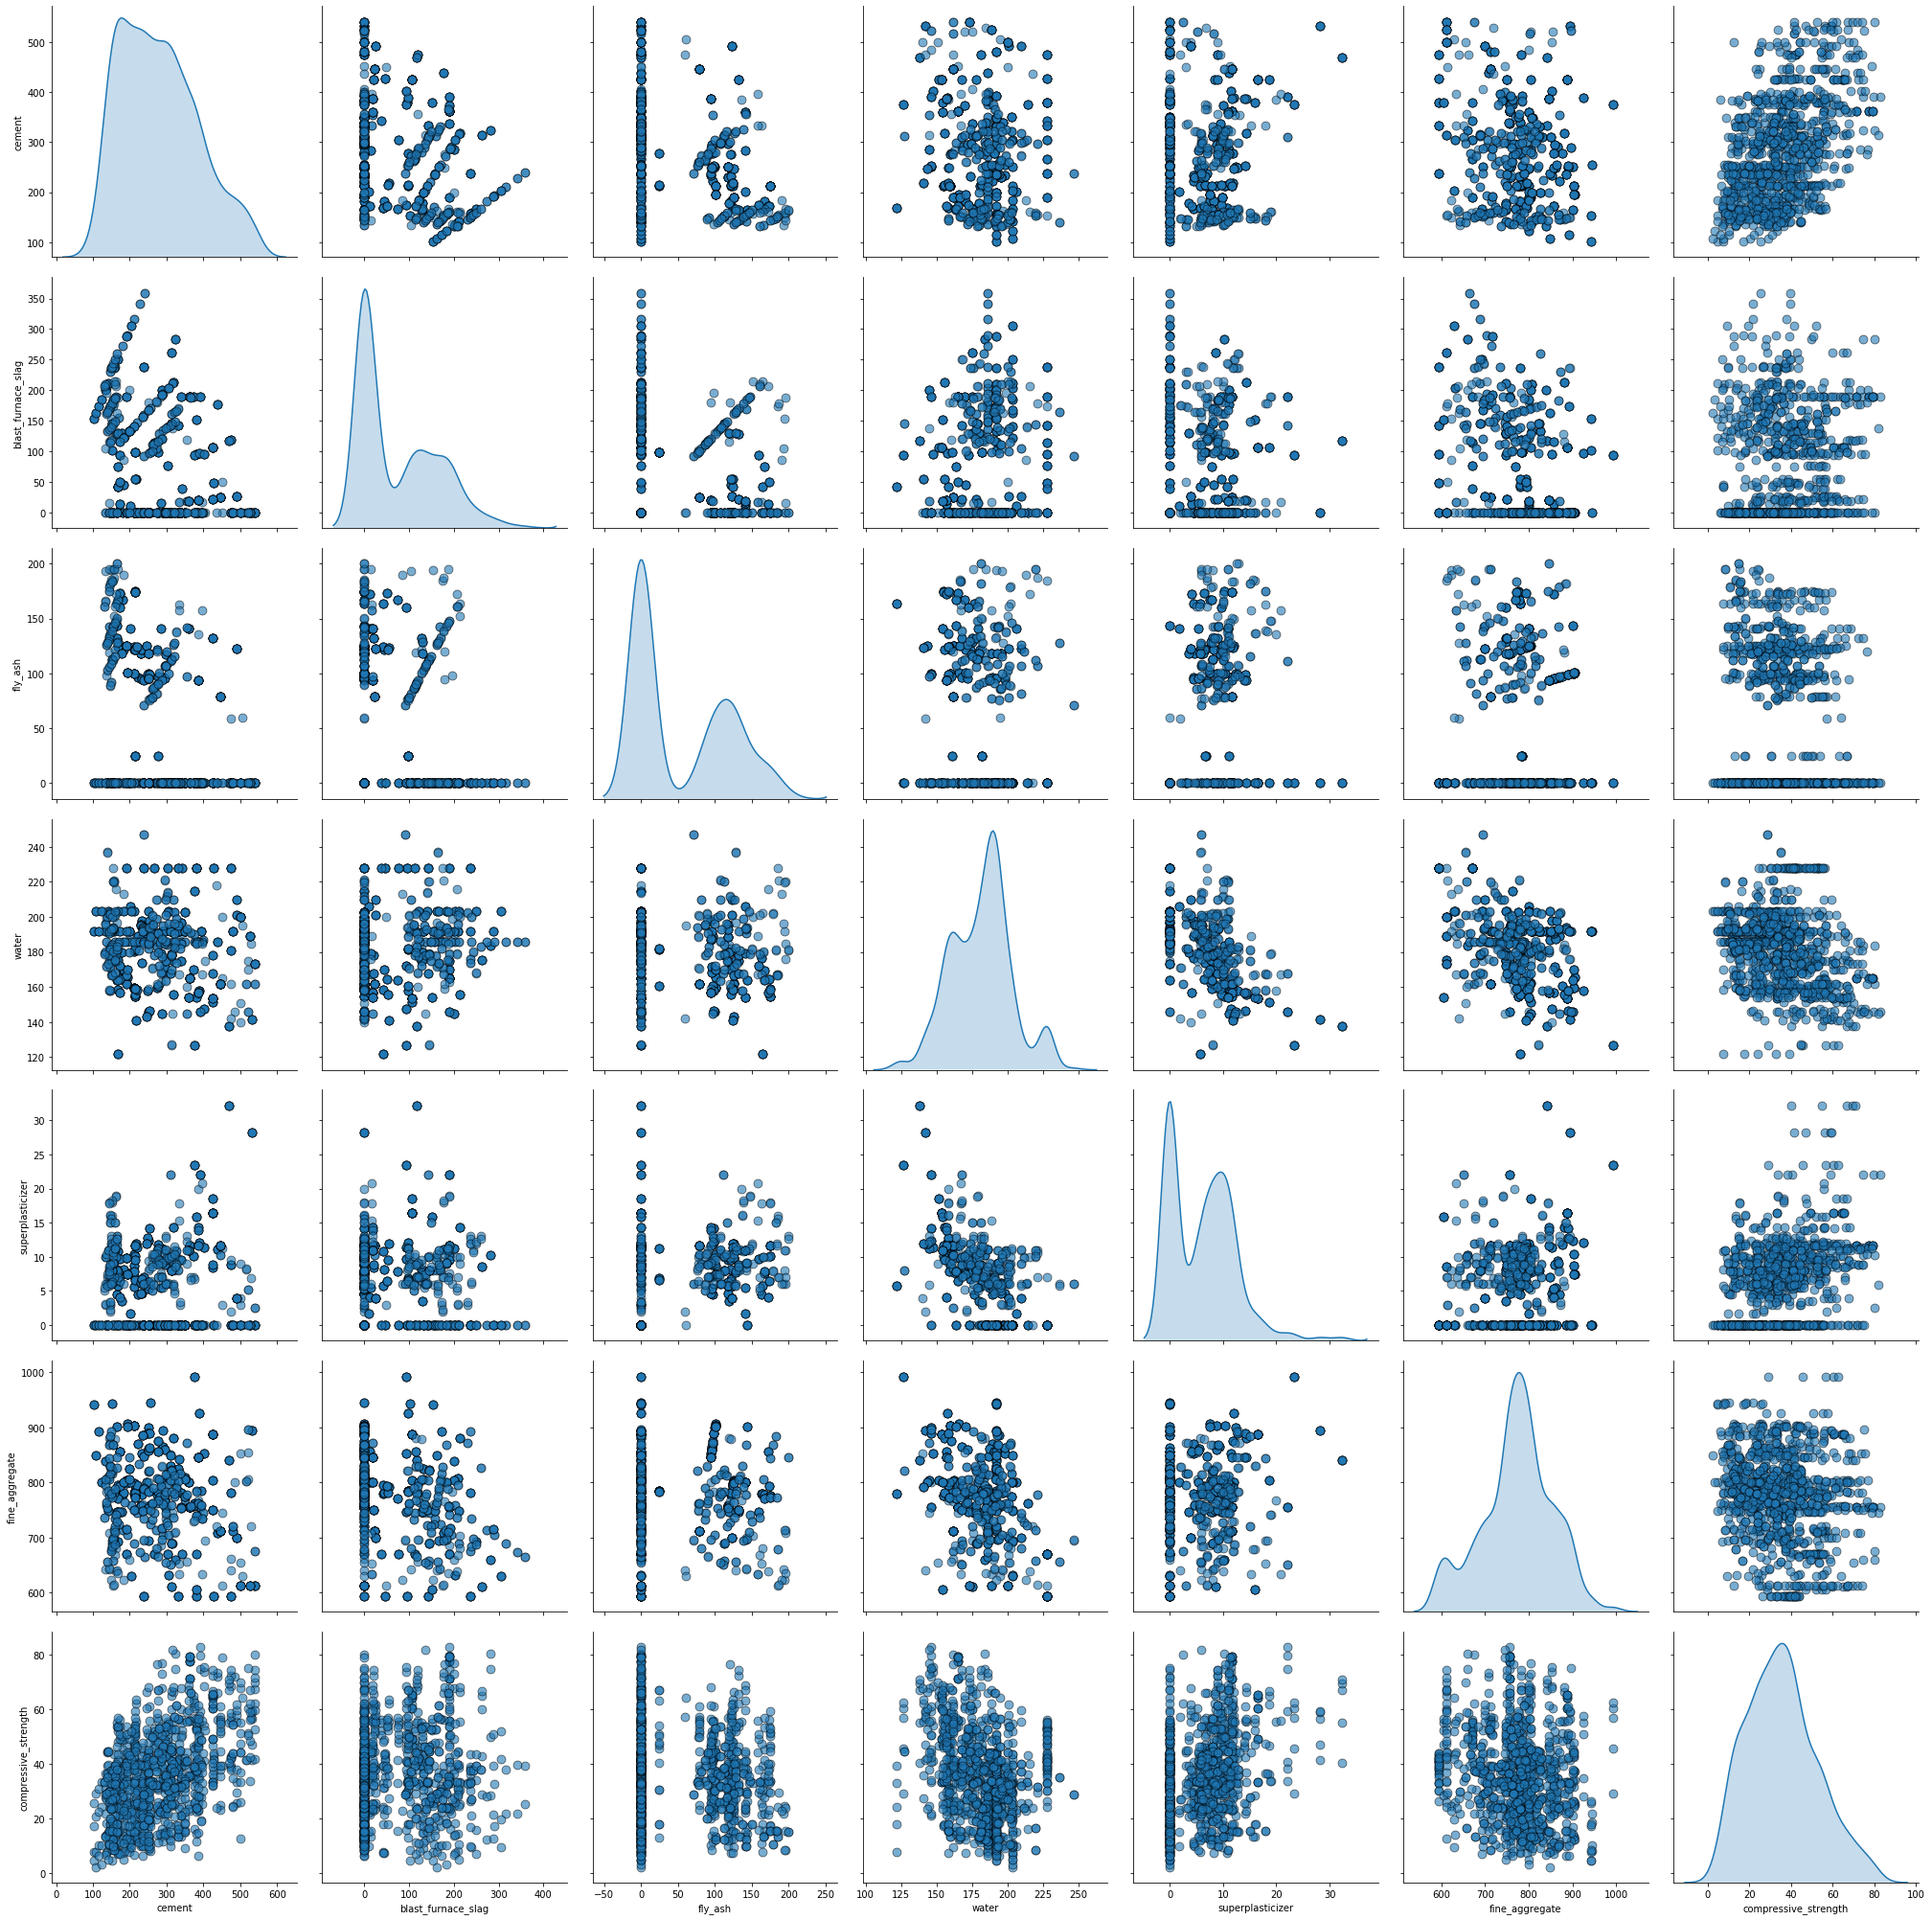

In [18]:
pair_plot(df,['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'fine_aggregate',
 'compressive_strength'],None)

## Model developement

### Train and test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['compressive_strength'],axis = 1), 
                                                    df.compressive_strength,
                                                    test_size=0.2, 
                                                    random_state=101)

In [20]:
len(X_train)

824

In [21]:
len(X_test)

206

### Pre processing

In [22]:
numeric = list(X_train.select_dtypes(include=['float64','int64']).columns)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numeric])
scaler.transform(X_train[numeric])
X_train_pre = pd.DataFrame(data = scaler.transform(X_train[numeric]), columns = numeric)
X_train_pre.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-1.310660,-0.857906,1.265401,-0.046668,0.826243,0.078445,0.476388,-0.289226
1,1.354670,0.379616,-0.843055,-1.423912,2.081795,-0.479318,0.379976,0.166924
2,0.044834,0.544930,0.638861,0.271878,0.508170,-0.884498,-0.952490,-0.289226
3,0.479544,-0.857906,-0.843055,0.477996,-1.031974,-0.540865,0.860801,-0.631338
4,0.073847,-0.857906,0.674844,-0.642537,0.543325,-0.156457,1.137677,-0.696502


In [23]:
X_test_pre = pd.DataFrame(data = scaler.transform(X_test[numeric]), columns = numeric)
X_test_pre.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,-0.443144,-0.857906,-0.843055,0.571686,-1.031974,-0.069010,1.384888,-0.696502
1,-0.587730,0.855766,-0.843055,0.182872,-1.031974,1.046517,-0.354240,-0.631338
2,-1.394368,1.028064,1.145459,-0.458905,0.642096,-0.646006,-0.110737,-0.289226
3,-1.213635,-0.857906,1.413750,0.524841,0.474689,-1.235825,1.174759,-0.289226
4,0.879058,0.234094,-0.843055,-2.585669,2.885349,-1.555096,2.714883,-0.696502


### Random Forest

#### Building Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=101)
forest_reg.fit(X_train_pre, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [25]:
y_pred = forest_reg.predict(X_test_pre)

#### Out of Sample RMSE

In [26]:
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

5.280441952417379

#### Cross validation scores

In [27]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train_pre, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [28]:
def display_scores(scores):
    print("Scores:", scores)
    print("The mean cross-validation score and the 95% confidence interval: ")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

display_scores(forest_rmse_scores)

Scores: [4.31967057 4.97029648 5.95944656 4.7934332  4.63395611 5.11056499
 4.74871237 4.95711257 5.50729068 4.67997694]
The mean cross-validation score and the 95% confidence interval: 
Accuracy: 4.97 (+/- 0.89)


#### Hyperparameter tuning

We will try and adjust following hyperparameters:

- n_estimators = number of trees in the forest
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

This model tuning is inspired by the post of Will Koehrsen in [Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) blog.

#### Random Hyperparameter Grid

In [29]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time.

In [30]:
model = RandomForestRegressor()

forest_reg_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, 
                               verbose=2, random_state=101, 
                               n_jobs = -1)

forest_reg_random.fit(X_train_pre, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [31]:
forest_reg_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [32]:
forest_scores_random = cross_val_score(forest_reg_random.best_estimator_,
                                       X_train_pre, y_train,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores_random  = np.sqrt(-forest_scores_random)

display_scores(forest_rmse_scores_random)

Scores: [4.42417206 4.99088958 5.56949404 4.65577972 4.62560944 5.0062591
 4.72417459 4.89921624 5.50316904 4.57776487]
The mean cross-validation score and the 95% confidence interval: 
Accuracy: 4.90 (+/- 0.73)


#### Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try.

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': ["auto"],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1.0, 2, 3],
    'n_estimators': [600, 800, 1000]
}


model = RandomForestRegressor()


grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

pprint(param_grid)

{'bootstrap': [True],
 'max_depth': [90, 100, 110],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1.0, 2, 3],
 'n_estimators': [600, 800, 1000]}


In [34]:
grid_search.fit(X_train_pre, y_train)

grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   49.5s finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [35]:
forest_scores_grid = cross_val_score(grid_search.best_estimator_,
                                       X_train_pre, y_train,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores_grid  = np.sqrt(-forest_scores_grid)

display_scores(forest_rmse_scores_grid)

Scores: [4.48599297 5.02597833 5.55443648 4.62470084 4.54439655 4.949168
 4.83735119 4.88251984 5.5348552  4.57420661]
The mean cross-validation score and the 95% confidence interval: 
Accuracy: 4.90 (+/- 0.73)


##### Out of Sample RMSE

In [36]:
y_pred = grid_search.best_estimator_.predict(X_test_pre)

rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

5.325575060155816

#### Feature Importance

In [37]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train_pre.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

,importance
age,0.344461
cement,0.299770
water,0.108079
blast_furnace_slag,0.080215
superplasticizer,0.080077
fine_aggregate,0.043130
coarse_aggregate,0.029088
fly_ash,0.015180


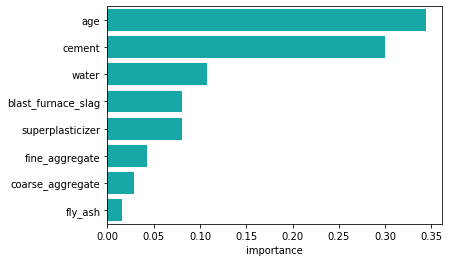

In [38]:
fig, (ax) = plt.subplots(1, 1, figsize=(6,4))

sns.barplot(x='importance', y=feature_importances.index, 
            data=feature_importances, color="c")

#### Partial dependency plots 

Partial dependence plots show the dependence between the target function and a set of ‘target’ features, marginalizing over the values of all other features (the complement features). Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

In [39]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [40]:
names = X_train_pre.columns
names

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

Features of interest are age,cement,water and blast furnace slag

Text(0.5, 0.98, 'Concrete Compressive Strength PDP plots')

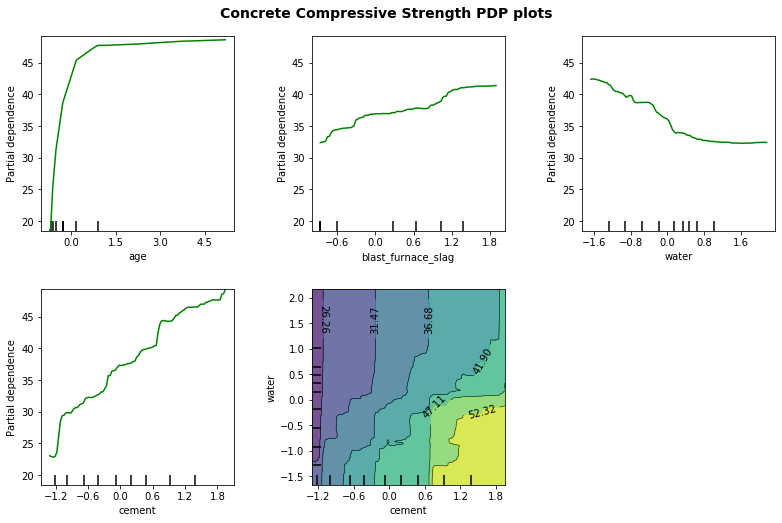

In [41]:
fig, (ax) = plt.subplots(1, 1, figsize=(12,8))

features = [7, 1, 3, 0,(0,3)]
plot_partial_dependence(grid_search.best_estimator_, X_train_pre, features, feature_names=names,
                            n_jobs=-1, grid_resolution=100, fig = fig)

fig.subplots_adjust(top=0.93)
fig.suptitle('Concrete Compressive Strength PDP plots', 
              fontsize=14, 
              fontweight='bold')

### Gradient Boosting 

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbt_reg = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, random_state=101)
gbt_reg.fit(X_train_pre, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=101, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
y_pred = gbt_reg.predict(X_test_pre)

#### Out of sample RMSE

In [44]:
from sklearn.metrics import mean_squared_error

gbt_mse = mean_squared_error(y_test, y_pred)
gbt_rmse = np.sqrt(gbt_mse)
gbt_rmse

4.990845579160022

#### Cross validation scores

In [45]:
from sklearn.model_selection import cross_val_score

gbt_scores = cross_val_score(gbt_reg, X_train_pre, y_train,
                                scoring="neg_mean_squared_error", cv=10)
gbt_rmse_scores = np.sqrt(-gbt_scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("The mean cross-validation score and the 95% confidence interval: ")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

display_scores(gbt_rmse_scores)

Scores: [4.11271653 4.55824193 5.58835215 4.28310523 4.89268816 4.82422261
 4.21857611 4.64635036 5.41903711 4.32411539]
The mean cross-validation score and the 95% confidence interval: 
Accuracy: 4.69 (+/- 0.95)


### Hyperparameter tuning

We will try and adjust following hyperparameters:

- n_estimators = the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- max_depth = maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- min_samples_split = minimum number of samples required to be at a leaf node.
- learning_rate = learning rate shrinks the contribution of each tree by learning_rate
- subsample = fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting.

#### Random Hyperparameter Grid

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]

min_samples_split = [2, 5, 10]

learning_rate = [float(x) for x in np.linspace(0.01, 1, num = 4)]

subsample = [float(x) for x in np.linspace(0.1, 1, num = 4)]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'learning_rate': learning_rate,
               'subsample': subsample}

pprint(random_grid)

{'learning_rate': [0.01, 0.34, 0.67, 1.0],
 'max_depth': [10, 35, 60, 85, 110],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'subsample': [0.1, 0.4, 0.7, 1.0]}


In [48]:
model = GradientBoostingRegressor()

gbt_reg_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, 
                               n_iter = 200, cv = 3, 
                               verbose=2, random_state=101, 
                               n_jobs = -1, iid = True)

gbt_reg_random.fit(X_train_pre, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:424: RuntimeWarning: overflow encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [49]:
gbt_reg_random.best_params_

{'subsample': 0.4,
 'n_estimators': 1000,
 'min_samples_split': 10,
 'max_depth': 85,
 'learning_rate': 0.01}

#### Grid Search with Cross Validation

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'subsample': [0.3,0.4,0.5],
                'n_estimators': [1500,1600,1700],
                'min_samples_split': [8,10,15,20],
                'max_depth': [100,110,120,150],
                'learning_rate': [0.01,0.05,0.1]}


model = GradientBoostingRegressor()


grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

pprint(param_grid)

{'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [100, 110, 120, 150],
 'min_samples_split': [8, 10, 15, 20],
 'n_estimators': [1500, 1600, 1700],
 'subsample': [0.3, 0.4, 0.5]}


In [51]:
grid_search.fit(X_train_pre, y_train)

grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  6.3min finished


{'learning_rate': 0.01,
 'max_depth': 100,
 'min_samples_split': 10,
 'n_estimators': 1500,
 'subsample': 0.3}

In [52]:
gbt_scores_grid = cross_val_score(grid_search.best_estimator_,
                                       X_train_pre, y_train,
                                scoring="neg_mean_squared_error", cv=10)

gbt_rmse_scores_grid  = np.sqrt(-gbt_scores_grid)

display_scores(gbt_rmse_scores_grid)

Scores: [3.49993213 3.79309954 4.06126643 3.30096693 3.92041841 3.86131365
 3.18401345 4.14557492 4.46028774 3.52193088]
The mean cross-validation score and the 95% confidence interval: 
Accuracy: 3.77 (+/- 0.76)


##### Out of Sample RMSE

In [53]:
y_pred = grid_search.best_estimator_.predict(X_test_pre)

gbt_mse = mean_squared_error(y_test, y_pred)
gbt_rmse = np.sqrt(gbt_mse)
gbt_rmse

4.212837020260947

#### Feature Importance

In [54]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train_pre.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances

,importance
age,0.294991
cement,0.264107
water,0.124711
superplasticizer,0.090624
blast_furnace_slag,0.083955
fine_aggregate,0.059940
coarse_aggregate,0.056705
fly_ash,0.024967


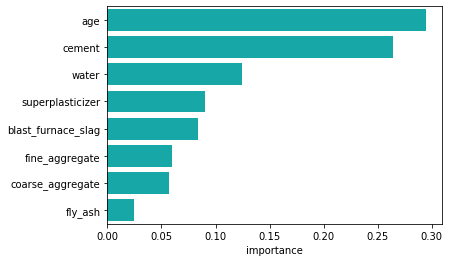

In [55]:
fig, (ax) = plt.subplots(1, 1, figsize=(6,4))

sns.barplot(x='importance', y=feature_importances.index, 
            data=feature_importances, color="c")

#### Partial dependency plots 

In [56]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [57]:
names = X_train_pre.columns
names

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

Text(0.5, 0.98, 'Concrete Compressive Strength PDP plots')

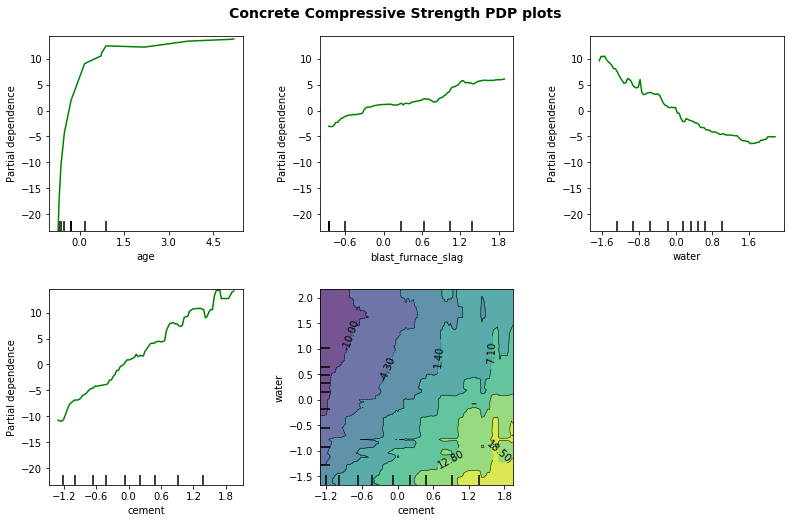

In [58]:
fig, (ax) = plt.subplots(1, 1, figsize=(12,8))

features = [7, 1, 3, 0,(0,3)]
plot_partial_dependence(grid_search.best_estimator_, X_train_pre, features, feature_names=names,
                            n_jobs=-1, grid_resolution=100, fig = fig)

fig.subplots_adjust(top=0.93)
fig.suptitle('Concrete Compressive Strength PDP plots', 
              fontsize=14, 
              fontweight='bold')

##### Custom 3d plot via partial_dependence

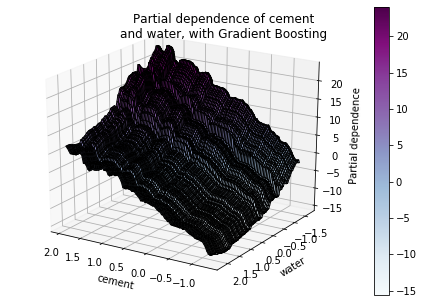

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

target_feature = (0,3)
pdp, axes = partial_dependence(grid_search.best_estimator_, X_train_pre, target_feature,
                                   grid_resolution=100)

XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')

ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')

#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of cement\n'
                 'and water, with Gradient Boosting')
plt.subplots_adjust(top=0.9)

plt.show()